<a href="https://colab.research.google.com/github/josehelioaraujo/FiapPosTechChallengeFase1_Preview/blob/main/Fiap_PosTech_IADT_HelioAndrade_Challenge_Fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**

Este projeto tem como objetivo a solução de um problema de um modelo preditivo de custo de seguro de saúde, relacionado ao **Tech Challenge Fase 1**, do curso de **Pós Gradução de IA para Devs** da **Fiap**.

**Aluno:**
- RM 355027 - José Hélio Araujo Andrade


# O Problema

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais
cobrados pelo seguro de saúde.

A base de dados para esse desafio pode ser algo como um arquivo CSV contendo os as colunas(idade,genero,imc, filhos,regiao, encargos).

Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência.


## Tarefas

## Exploração de dados
   - Carregue a base de dados e explore suas características.
   - Analise estatísticas descritivas e visualize distribuições revelantes.
   
## Pré-processamento de dados:
  - Realize a limpeza dos dados, tratando valores ausentes(se necessário)
  - Converta variáveis categóricas em formatos adequados para a modelagem.

## Modelagem
  - Crie um modelo preditivo de regressão utilizando uma técnica a sua escolha(por exemplo, Regressão Linear, Árvores de Decisão, etc)

## Treinamento e avaliação do modelo:
 - Treine o modelo com o conjunto de treinamento.


## Validação estatísticas:
- Utilize métricas estatísticas para validar a eficácia do modelo(p-value, intervalo de confiança);

## O que avaliaremos:
  - Apresente resultados visuais, como gráficos de previsões vs valores reais.
  - Elabore um relatório que inclua uma análise de resultados, insigts obtidos e validação estatística.

## Observações:
- Esperamos que o modelo seja capaz de fazer predições confiáveis dos custos médicos individuais com base nas caractéricas fornecidas.

# A Solução implementada:

A Solução implementada é composta por 4 partes:

### Seção 1 - Importando bibliotecas

Utilizaremos as bibliotecas numpy, pandas, matplotlib, seaborn esklearn.

### Seção 2 - Coleta e análise de dados
Fonte dos dados: https://www.kaggle.com/datasets/mirichoi0218/insurance
O dataset é composto pelas seguintes colunas:

- age: idade do beneficiário principal

- sex:
    gênero do contratante de seguros, feminino, masculino
- bmi: Índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg/m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9
- children: Número de filhos cobertos por seguro saúde / Número de dependentes
- smoker: Se tem o hábito de fumar ou não
- region: Localidade residencial do beneficiário nos EUA, nnortheast, southeast, southwest, northwest.
- charges : Os encargos ou custos médicos individuais cobrados pelo seguro de saúde


### Seção 3 - Análise de dados

### Seção 4 - Pré-processamento de dados

### Seção 5 - Treinamento de modelo

### Seção 5 - Conclusões



# Seção 1 - Importando bibliotecas
Usaremos as segunte bibliotecas:numpy,pandas, matplotlib,seaborn e sklearn


# Seção 3 - Análise de dados

# Seção 4 - Pré-processamento de dados

# Seção 5 - Treinamento de modelo

# Seção 6 - Conclusões




In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt


Seção 2 - Coleta e análise de dados

**Observações:**

[Dataset obtido da plataforma Kaggle](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# carregando os dados do arquivo csv para um DataFrame do Pandas
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [11]:
# exibindo nomes das colunas do dataset
# Antes as colunas são: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'
print(insurance_dataset.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [12]:
# renomeando as colunas do dataset para português

insuarance_br = insurance_dataset.rename(
     columns={insurance_dataset.columns[0]:'idade',
              insurance_dataset.columns[1]: 'sexo',
              insurance_dataset.columns[2]: 'imc',
              insurance_dataset.columns[3]: 'filhos',
              insurance_dataset.columns[4]: 'fumante',
              insurance_dataset.columns[5]: 'regiao',
              insurance_dataset.columns[6]: 'encargos'
             })

# depois as colunas ficarão como: 'idade', 'sexo', 'imc', 'filos', 'fumante', 'regiao', 'encargos'
print(insuarance_br.columns)


Index(['idade', 'sexo', 'imc', 'filhos', 'fumante', 'regiao', 'encargos'], dtype='object')


In [13]:
insurance_dataset = insurance_dataset.rename(columns={insurance_dataset.columns[5]: 'encargos'})
print(insurance_dataset.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'encargos', 'charges'], dtype='object')


In [ ]:
# primeiras 5 linhas do dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,encargos,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# obtendo número de linhas e colunas - existem 1138 linhas e 7 colunas
insurance_dataset.shape

(1338, 7)

In [15]:
# obtendo informações dos data type do conjunto de dados
# as variáveis categóricas são: sex, smoker e region
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   encargos  1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# verificando valores ausentes, e observa-se que não existem
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
encargos    0
charges     0
dtype: int64

In [ ]:
# verificando se existem linhas duplicadas, e observa-se que existe uma linha
insurance_dataset.duplicated().sum()

1

In [ ]:
# removendo linhas duplicadas, e observa-se que agora existem 1337 linhas

insurance_dataset.drop_duplicates(inplace=True)

print(insurance_dataset)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


# Seção 3 - Análise de dados

In [ ]:
# exibindo as medidas estatísticas do dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# exibindo quantidade de pessoas por idade
insurance_dataset['age'].value_counts()


age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

<ipython-input-25-bd20f861a7ac>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


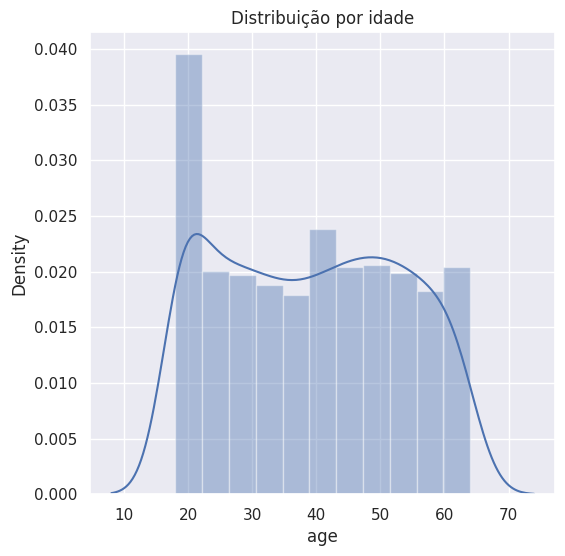

In [ ]:
# distribuição por idade
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Distribuição por idade')
plt.show()

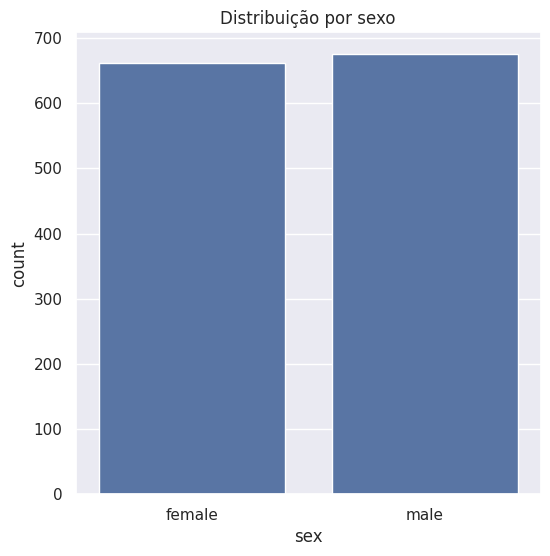

In [ ]:
# distribuição por gênero ou sexo
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Distribuição por sexo')
plt.show()

In [ ]:
# exibindo quantidade de pessoas por sexo
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-20-ef3ad084c5e5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


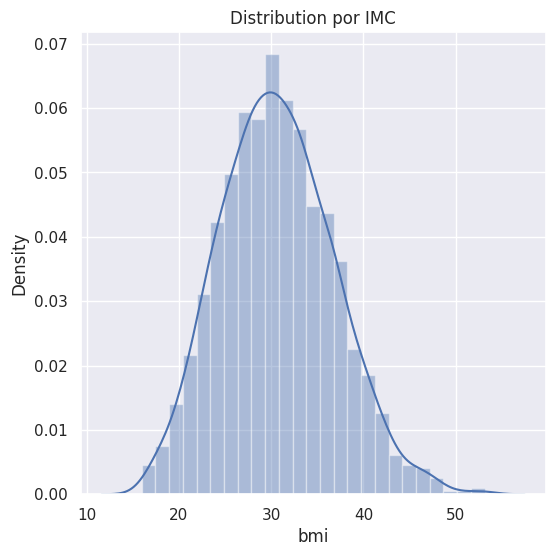

In [ ]:
# distribuição por IMC - Indíce por Massa Corporal
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Distribuição por IMC')
plt.show()

Faixa IMC NORMAL --> 18.5 to 24.9

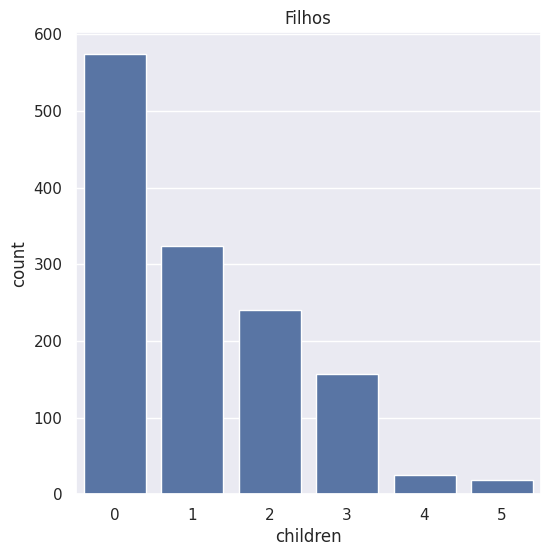

In [ ]:
# distribuição por filhos
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Distribuição por filhos')
plt.show()

In [ ]:
# exibindo quantidade de pessoas por filhos
insurance_dataset['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

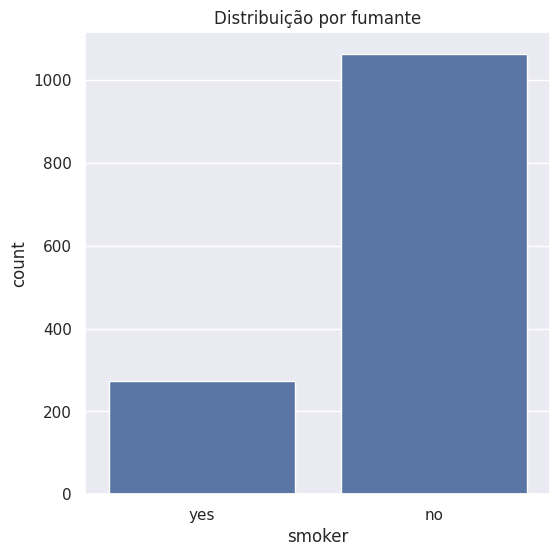

In [ ]:
# distribuição por fumante
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Distribuição por fumante')
plt.show()

In [ ]:
# exibindo quantidade de pessoas por fumante
insurance_dataset['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

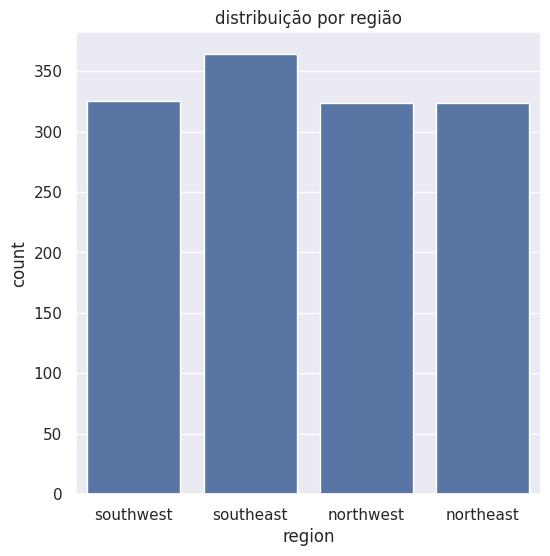

In [ ]:
# distribuição por região
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('distribuição por região')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<ipython-input-50-0ad5dbc84d3f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


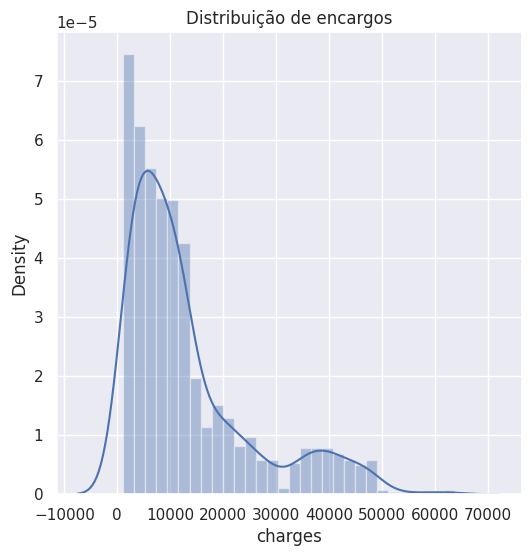

In [ ]:
# distribuição dos valores de encargos ou custo
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Distribuição de encargos')
plt.show()

#Seção 4 - Pré-processamento de dados

Normalizando as variáveis categóricas

In [ ]:
# normalizando a variável 'sexo'
insurance_dataset.replace({'sex':{'masculino':0,'feminino':1}}, inplace=True)

# normalizando a coluna 'fumante'
insurance_dataset.replace({'smoker':{'sim':0,'nao':1}}, inplace=True)

# normalizando  a coluna 'região'
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

NameError: name 'insurance_dataset' is not defined

Dividindo as variáveis features e target ou alvo (encargos)

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age     sex     bmi  children smoker  region
0      19  female  27.900         0    yes       1
1      18    male  33.770         1     no       0
2      28    male  33.000         3     no       0
3      33    male  22.705         0     no       3
4      32    male  28.880         0     no       3
...   ...     ...     ...       ...    ...     ...
1333   50    male  30.970         3     no       3
1334   18  female  31.920         0     no       2
1335   18  female  36.850         0     no       0
1336   21  female  25.800         0     no       1
1337   61  female  29.070         0    yes       3

[1337 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Dividindo o dataset em dados de treinamento(80%) e teste(20%)

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_treino.shape, X_teste.shape)

(1338, 6) (1070, 6) (268, 6)


# Seção 5 - Treinamento de modelo

## 1 - Usando o modelo Regressão Linear

In [ ]:
# carregando o modelo de regressão linear
regressor = LinearRegression()

In [ ]:
# treinando o modelo de regressão linear
regressor.fit(X_treino, Y_treino)

**Avaliação do modelo de regressão linear **

In [ ]:
# predição em dados de treinamento
training_data_prediction =regressor.predict(X_treino)

In [ ]:
# aplicar métrica R squared
r2_treino = metrics.r2_score(Y_treino, training_data_prediction)
print('r2_treino:', r2_treino)

r2_treino: 0.751505643411174


In [ ]:
# fazendo predição usando os dados de teste
test_data_prediction =regressor.predict(X_teste)

In [ ]:
# aplicando a métrica
r2_teste = metrics.r2_score(Y_teste, test_data_prediction)
print('r2_teste:', r2_teste)

r2_teste: 0.7447273869684076


## 2 - Usando o modelo random forest


In [ ]:
# carregando o modelo de randon forest
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()



In [ ]:
# treinando os dados de treianamento do  modelo randon forest
regressor_rf.fit(X_treino, Y_treino)

RandomForestRegressor()

In [ ]:
# fazendo predição do modelo random forest usando os dados de teste
test_data_prediction_rf =regressor_rf.predict(X_teste)

In [ ]:
# aplicando métrica r2 no modelo random forest
r2_rf_teste = metrics.r2_score(Y_teste, test_data_prediction_rf)
print('r2_teste_rf:', r2_rf_teste)

r2_teste_rf: 0.7447273869684076


## 3 - Usando o modelo Regressão XGBoost

In [ ]:
# carregando o modelo XGBoost
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(X_treino, Y_treino)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
# fazendo predição do modelo XGBoost usando os dados de teste
y_predicao_xgb = regressor_xgb.predict(X_teste)

In [ ]:
# aplicando a métrica r2 do modelo xgBoost
r2_xgb_teste = metrics.r2_score(Y_teste, y_predicao_xgb)
print('r2_teste_xgb:', r2_xgb_teste)

r2_teste_xgb: 0.8662432902515654


**Comparando os modelos treinados**


## Comparação dos modelos usando a métrica R2


In [ ]:
# Exibindo os resultados da métrica R2 para os 3 modelos treinados conforme os tipos utilizados
print('Resultados das métricas R2 para os modelos do tipo:')
print('+-------+------ -----------+--------------------+')
print('|Métrica|Tipo Modelo       | Valor              |')
print('|-------+------ -----------+--------------------+')
print('|R2     | Regressão Linear |', r2_teste, '|')
print('|R2     | Random Forest    |', r2_rf_teste,'|')
print('|R2     | XG Boost         |', r2_xgb_teste,'|')
print('|-------+------ -----------+--------------------+')




Resultados das métricas R2 para os modelos do tipo:
+-------+------ -----------+--------------------+
|Métrica|Tipo Modelo       | Valor              |
|-------+------ -----------+--------------------+
|R2     | Regressão Linear | 0.7447273869684076 |
|R2     | Random Forest    | 0.8370748848709408 |
|R2     | XG Boost         | 0.8662432902515654 |
|-------+------ -----------+--------------------+


In [ ]:
# Escolhendo o melhor modelo conforme métrica R2
metricas_r2 = [r2_teste, r2_rf_teste, r2_xgb_teste]
modelos_rs = ['Regressão Linear', 'Random Forest', 'XG Boost']

r2_maior_valor = max(metricas_r2)
indice_maior_valor_r2 = metricas_r2.index(r2_maior_valor)

print( modelos_rs[indice_maior_valor_r2] )

print('O melhor modelo foi', modelos_rs[indice_maior_valor_r2], 'com valor R2',r2_maior_valor)


XG Boost
O melhor modelo foi XG Boost com valor R2 0.8662432902515654


# Seção 5 - Conclusões

Conforme a métrica R2 aplicada para os modelos utilizad, o melhor modelo preditivo do valor do custo de seguro, é o modelo XG Boost, conforme tabela exbida abaixo:

- Regressão Linear - R2:  0.7447273869684076

- Random Forest - R2: 0.8370748848709408

- XG Boost - R2: 0.8662432902515654          


# Seção 6 - Testando o modelo construido usando um formulário simples

In [ ]:
# Input de dados: idade, sexo, imc, 'filhos', 'fumante', 'regiao'

# Formulário de entrada de dados

gender     = 'Male' # @param ["Female", "Male" ]
smoker = "No" #@param ["Yes", "No"]
region = "Southeast" #@param ['Southeast','Southwest','Northwest','Northeast']
age = 5 # @param {type:"slider", min:5, max:80, step:1}
bmi = 26.4 # @param {type:"slider", min:10, max:50, step: 0.1}
children = 5 # @param {type:"slider", min:0, max:5, step:1}


if gender == 'Female':
      gender = 0
else:
    gender = 1

if smoker == 'Yes':
   smoker = 1
else:
   smoker = 0

if region == 'Southeast':
   region = 0
if region == 'Southwest':
   region = 1
if region == 'NorthEast':
   region = 2
else:
  region = 3

input_data = (age, gender, bmi, children,smoker, region)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)

input_data = (age, gender, bmi, children,smoker, region)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)
#input_data = (31, 1, 25.74, 0, 1 ,0)

#input_data = (idade, sexo, imc, qtde_filhos, fumante , regiao)

# alterando input_data para uma matriz numpy
input_data_as_numpy_array = np.asarray(input_data)

# reshape o array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('O Custo do seguro(dólares)', prediction[0])

# Seção 7 - Referências e Créditos

Seção 10 - Referências e Créditos
Fontes:

[Conjunto de dados insurance.csv obtido do Kaggle](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)

[O que é IMC Definição do Índice Massa Corpórea e para que serve](https://www.prefeitura.sp.gov.br/cidade/secretarias/saude/noticias/?p=332991)

O Índice de Massa Corporal (IMC) é uma das principais ferramentas, adotada inclusive pela Organização Mundial de Saúde (OMS), para calcular o chamado “peso ideal”. Obtido a partir do peso e da altura do indivíduo, o IMC também aponta níveis de magreza e obesidade, que são usados para nortear o trabalho de profissionais de saúde e de educadores físicos.

Para obter o IMC, basta dividir o seu peso (em quilos) pela altura (em metros) elevada ao quadrado (altura x altura). De acordo com o indicador, o peso considerado saudável é aquele situado entre 18,5 e 24,9.

Os outros marcadores do IMC são:

- magreza leve (entre 17 e 18,4);
- magreza moderada (entre 16 e 16,9) ;
- magreza grave (menor que 16);
- sobrepeso (índice de 25 a 29,9);
- obesidade grau 1 (30 a 34,9);
- obesidade severa (35 a 39,9)
- obesidade mórbida (acima de 40).

## Algumas métricas de modelos de Machine Learning:

- MAE - Mean Absolute Error(Erro Médio Absoluto)

  O MAE mede a média dos erros absolutos entre as previsões do modelo e os valores reais.

  É útil quando você deseja entender o tamanho médio dos erros em unidades originais (por exemplo, em dólares, minutos, etc.)
  É robusto contra outliers

  No entanto, não penaliza erros grandes de forma diferente dos erros pequenos.

- MAPE-Mean Absolute Percentage Error(Erro Percentual Médio Absoluto)

  É semelhante ao MAE, mas expresso como uma porcentagem.
  É útil para avaliar o erro relativo em relação aos valores reais.
  No entanto, pode ser sensível a valores próximos a zero.


- RMSE-Root Mean Squared Error(Raiz do Erro Quadrático Médio)

  RMSE é a raiz quadrada da média dos erros quadráticos
  entre as previsões e os valores reais

  Ele penaliza erros maiores mais fortemente do que o MAE
  É sensível a outliers.
  Coeficiente de Determinação (R²-R-squared)

  O R² mede a proporção da variabilidade nos dados que é explicada pelo modelo.
  Um valor próximo a 1 indica que o modelo se ajusta bem
  aos dados.
   No entanto, ele não considera a escala dos erros e pode ser enganoso com modelos complexos.
   Em relação à escolha entre essas métricas:

**Escolha a métrica conforme o contexto do problema:**

   - Use o MAE quando você precisa de uma medida simples e interpretação direta dos erros.

   - O MAPE é útil quando você deseja avaliar o erro percentual. O RMSE é comumente usado quando queremos penalizar erros maiores.

   - O R² é útil para entender a variância explicada pelo modelo, mas não deve ser usado isoladamente.



In [ ]:
# Formulário de entrada de dados

sexo      = 'Male' # @param ["Female", "Male" ]
fumante = "No" #@param ["Yes", "No",""]
regiao = "Sudeste" #@param ['Sudeste','Sudoeste','Nordeste','Noroeste']

idade = 5 # @param {type:"slider", min:5, max:80, step:1}
imc = 26.4 # @param {type:"slider", min:10, max:50, step: 0.1}
qtde_filhos = 3 # @param {type:"slider", min:0, max:5, step:1}


